In [1]:
data = read.table("modisco_compare/combine_pd_benchmark.csv", sep=",")

In [2]:
#data[data$V2=="ChromBpnet-Counts",]

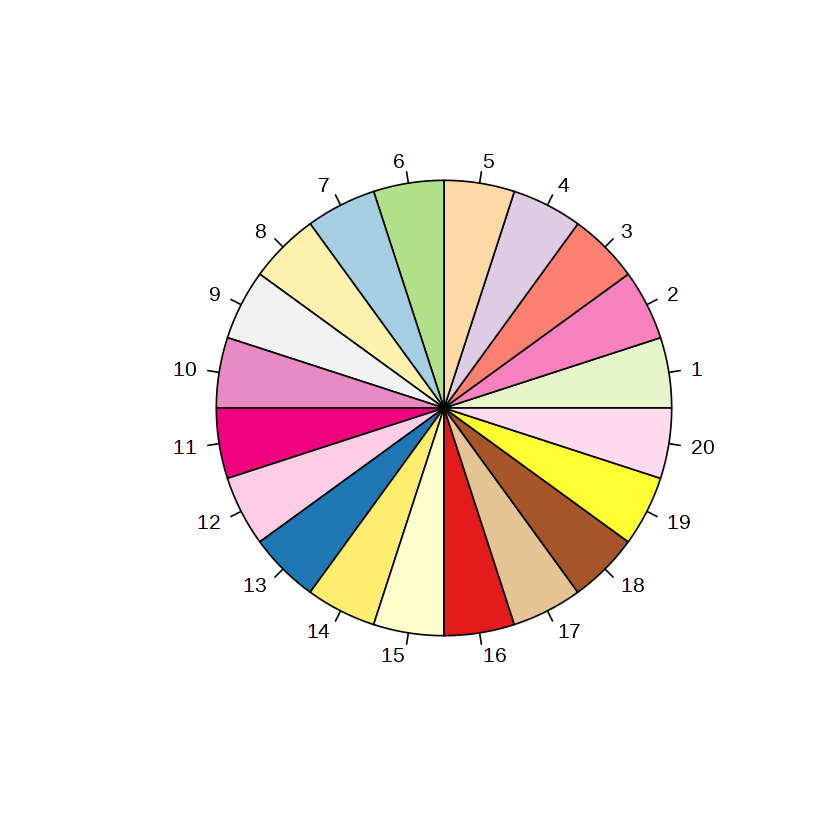

In [3]:
library(RColorBrewer)
n <- 20
qual_col_pals = brewer.pal.info[brewer.pal.info$category == 'qual',]
col_vector = unlist(mapply(brewer.pal, qual_col_pals$maxcolors, rownames(qual_col_pals)))
pie(rep(1,n), col=sample(col_vector, n))

In [4]:
merged_new2 = data[data$V2=="ChromBpnet-Counts",]
MotifNames = merged_new2[order(merged_new2$V3, decreasing=TRUE),]$V1
MotifNames = c(MotifNames,c("DNase-I", "GC", "USF2", "PAX5"))
MotifNames
data$V1 <- factor(data$V1, levels = MotifNames[!duplicated(MotifNames)])
print(length(data$V1))

[1] "SPI1"      "CTCF"      "BATF/JUNB" "IRF4"      "RUNX3"     "IRF4"     
 [7] "RELB"      "SP1"       "NRF1"      "POU2F2"    "ATF3"      "NFYA"     
[13] "EBF1"      "RELB"      "ZNF143"    "dimer"     "DNase-I"   "GC"       
[19] "USF2"      "PAX5"

[1] 82


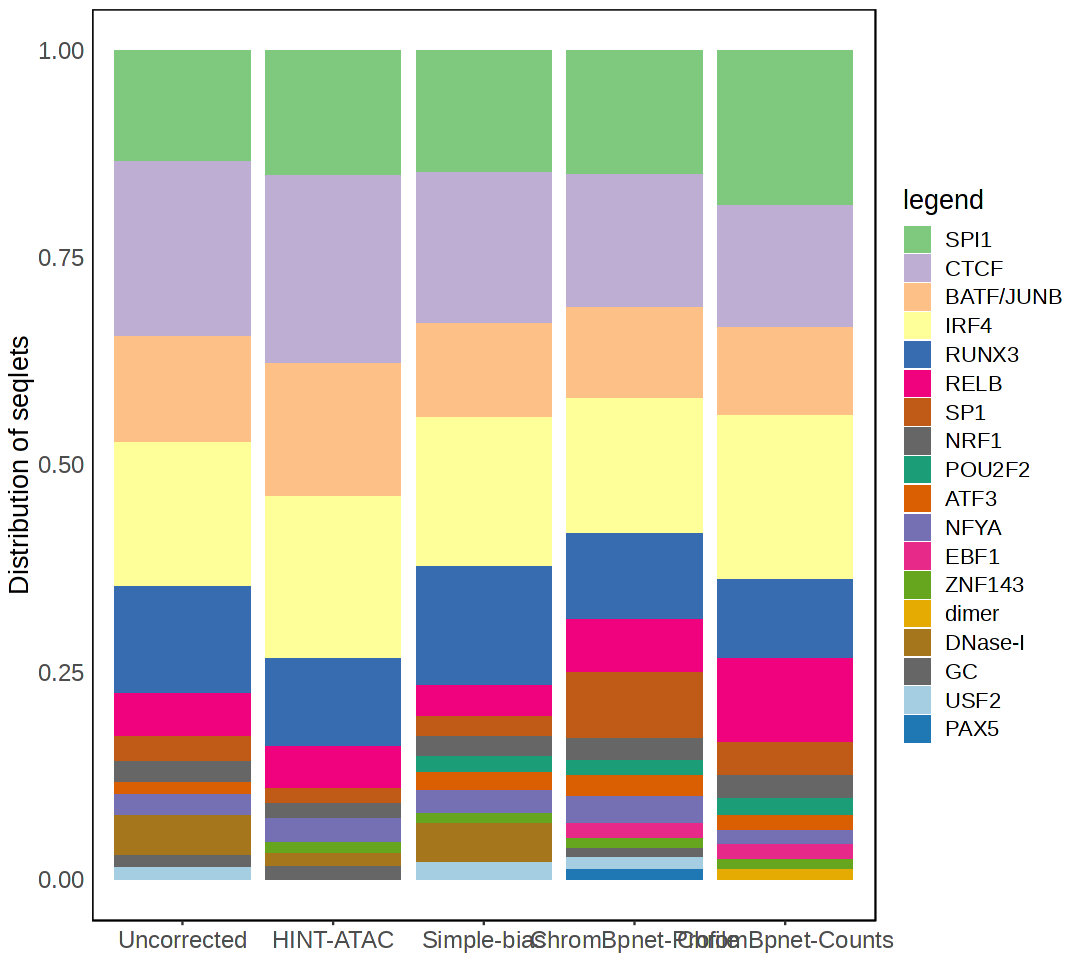

In [7]:
library(ggplot2)
#data
options(repr.plot.width = 9, repr.plot.height = 8)


ggplot(data, aes(x=V2, y=V3, fill=V1)) +
geom_bar(position='fill', stat='identity') +
theme_classic() +
theme(plot.title = element_text(hjust = 0.5),
    text = element_text(size=16),
    axis.line=element_blank(),
    axis.ticks.y=element_blank(),
    axis.title.x=element_blank(),
    axis.text.x = element_text(angle=0, vjust=0.5, hjust=0.5, size=14),
    axis.text.y = element_text(size=14),
    panel.border = element_rect(colour = "black", fill=NA, size=0.5)) +  scale_x_discrete(limits =c("Uncorrected","HINT-ATAC", "Simple-bias","ChromBpnet-Profile", "ChromBpnet-Counts")) +
scale_fill_manual("legend", values = col_vector) +
ylab("Distribution of seqlets")
ggsave("modisco_compare/modisco_distribution_benchamrking.pdf", width=9, height=8)


,V1,V2,V3
,<fct>,<chr>,<dbl>
17,CTCF,HINT-ATAC,0.18170597
18,IRF4,HINT-ATAC,0.15688781
19,BATF/JUNB,HINT-ATAC,0.15049592
20,SPI1,HINT-ATAC,0.14176769
21,RUNX3,HINT-ATAC,0.09984571
22,RELB,HINT-ATAC,0.04690324
23,CTCF,HINT-ATAC,0.03094556
24,NFYA,HINT-ATAC,0.02838880
25,IRF4,HINT-ATAC,0.02618470
